<a href="https://colab.research.google.com/github/kailash14/kailash/blob/master/Kailash_D19013_Deeplearning_assignment_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST DATA SET 
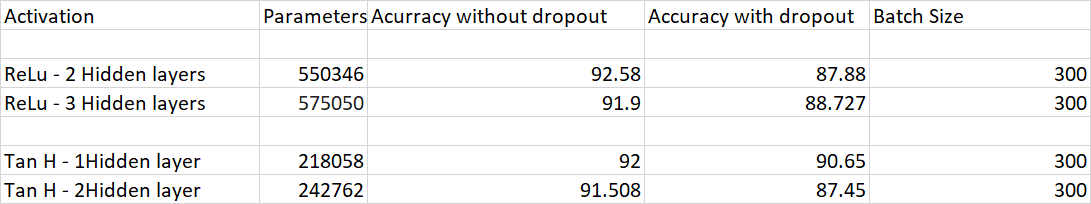
# I have used two different activation functions to compare which one does better with maximum 10 epoch and with batch size of 300 and found that the accuracy is similar for both reLU and Tanh but more the hidden  layers we add , the more prone our model is to overfitting.


In [0]:
# Import necessary packages

%matplotlib inline

import numpy as np
import torch
import helper
import matplotlib.pyplot as plt
from torch import nn, optim
from torch.autograd import Variable
from torchvision import datasets, transforms
import torch.nn.functional as F

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor()])

# Download and load the training data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
testset = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
torch.manual_seed(100)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size= 100, shuffle= False)


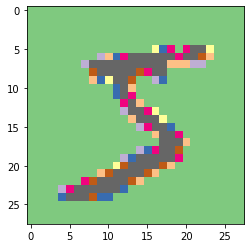

In [2]:
plt.imshow(trainset[0][0].reshape((28,28)), cmap="Accent");
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')

### 2 Layer Network with ReLU Activation

In [3]:
# Without Dropout
from torch import optim

torch.manual_seed(100)
model_1layer=nn.Sequential(
    nn.Linear(784,512),
    nn.ReLU(),
    nn.Linear(512,256),
    nn.ReLU(),
    nn.Linear(256,64),
    nn.ReLU(),
    nn.Linear(64,10),
    nn.LogSoftmax(dim=1)
)
# Define loss function & optimizer
criterion = nn.CrossEntropyLoss()
optimizer_1layer=optim.SGD(model_1layer.parameters(), lr=0.01)

print("Model without dropout:",model_1layer)

# With Dropout

model_drop_1layer= nn.Sequential(
    nn.Linear(784,512),
    torch.nn.Dropout(0.5),
    nn.Linear(512,256),
    nn.ReLU(),
    nn.ReLU(),
    nn.Linear(256,64),
    torch.nn.Dropout(0.5),
    nn.ReLU(),
    nn.Linear(64,10),
    nn.LogSoftmax(dim=1)
)
optimizer_drop_1layer=optim.SGD(model_drop_1layer.parameters(), lr=0.01)
print("Model with dropout:",model_drop_1layer)

Model without dropout: Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=10, bias=True)
  (7): LogSoftmax()
)
Model with dropout: Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): Dropout(p=0.5, inplace=False)
  (2): Linear(in_features=512, out_features=256, bias=True)
  (3): ReLU()
  (4): ReLU()
  (5): Linear(in_features=256, out_features=64, bias=True)
  (6): Dropout(p=0.5, inplace=False)
  (7): ReLU()
  (8): Linear(in_features=64, out_features=10, bias=True)
  (9): LogSoftmax()
)


In [4]:
count_parameters(model_1layer)

401408
   512
131072
   256
 16384
    64
   640
    10
______
550346


In [5]:
epochs = 10
# No - Dropout


train_losses,test_losses=[],[]
train_correct,test_correct = [],[]
acc =[]

for i in range(epochs):
    train = 0
    test = 0
    runningloss = 0

    # Run the training batches on model without dropout
    for b, (X_train, y_train) in enumerate(trainloader):
        b+=1
        
        # Apply the model
        y_pred = model_1layer(X_train.view(100, -1))  # Here we flatten X_train
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train += batch_corr
        
        # Update parameters
        optimizer_1layer.zero_grad()
        loss.backward()
        optimizer_1layer.step()
        
        # Print interim results
        if b%300 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  accuracy: {train.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(train)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(testloader):

            # Apply the model
            y_val = model_1layer(X_test.view(len(X_test), -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            test += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(test)

epoch:  0  batch:  300 [ 30000/60000]  loss: 2.28184223  accuracy:  16.200%
epoch:  0  batch:  600 [ 60000/60000]  loss: 2.22485733  accuracy:  24.287%
epoch:  1  batch:  300 [ 30000/60000]  loss: 2.00189996  accuracy:  49.870%
epoch:  1  batch:  600 [ 60000/60000]  loss: 1.32856524  accuracy:  52.962%
epoch:  2  batch:  300 [ 30000/60000]  loss: 0.91351867  accuracy:  72.003%
epoch:  2  batch:  600 [ 60000/60000]  loss: 0.54053038  accuracy:  75.787%
epoch:  3  batch:  300 [ 30000/60000]  loss: 0.45485938  accuracy:  83.287%
epoch:  3  batch:  600 [ 60000/60000]  loss: 0.40505877  accuracy:  84.533%
epoch:  4  batch:  300 [ 30000/60000]  loss: 0.30901927  accuracy:  87.410%
epoch:  4  batch:  600 [ 60000/60000]  loss: 0.37824008  accuracy:  87.810%
epoch:  5  batch:  300 [ 30000/60000]  loss: 0.53507239  accuracy:  89.373%
epoch:  5  batch:  600 [ 60000/60000]  loss: 0.46235520  accuracy:  89.435%
epoch:  6  batch:  300 [ 30000/60000]  loss: 0.30771184  accuracy:  90.140%
epoch:  6  b

In [6]:
#dropout is used here
print("Dropout =  0.5")
epochs = 10
train_losses_d,test_losses_d=[],[]
train_correct_d,test_correct_d = [],[]
acc_d =[]
for i in range(epochs):
    train_d = 0
    test_d = 0
    runningloss_d = 0
    
    
    # Run the training batches on model with dropout
    for b, (X_train, y_train) in enumerate(trainloader):
        b+=1
        
        # Apply the model
        y_pred_d = model_drop_1layer(X_train.view(100, -1))  # Here we flatten X_train
        loss_d = criterion(y_pred_d, y_train)
 
        # Tally the number of correct predictions
        predicted_d = torch.max(y_pred_d.data, 1)[1]
        batch_corr_d = (predicted_d == y_train).sum()
        train_d += batch_corr_d
        
        # Update parameters
        optimizer_drop_1layer.zero_grad()
        loss_d.backward()
        optimizer_drop_1layer.step()
        
        # Print interim results
        if b%300 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss_d.item():10.8f}  accuracy: {train_d.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses_d.append(loss_d)
    train_correct_d.append(train_d)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(testloader):

            # Apply the model
            y_val = model_drop_1layer(X_test.view(len(X_test), -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted_d = torch.max(y_val.data, 1)[1] 
            test_d += (predicted_d == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss_d = criterion(y_val, y_test)
    test_losses_d.append(loss_d)
    test_correct_d.append(test_d)
        

Dropout =  0.5
epoch:  0  batch:  300 [ 30000/60000]  loss: 2.26210952  accuracy:  15.513%
epoch:  0  batch:  600 [ 60000/60000]  loss: 2.11247015  accuracy:  25.412%
epoch:  1  batch:  300 [ 30000/60000]  loss: 1.51228881  accuracy:  45.763%
epoch:  1  batch:  600 [ 60000/60000]  loss: 1.21141446  accuracy:  50.920%
epoch:  2  batch:  300 [ 30000/60000]  loss: 0.89072204  accuracy:  66.340%
epoch:  2  batch:  600 [ 60000/60000]  loss: 0.67581308  accuracy:  69.523%
epoch:  3  batch:  300 [ 30000/60000]  loss: 0.62464356  accuracy:  76.780%
epoch:  3  batch:  600 [ 60000/60000]  loss: 0.51100439  accuracy:  77.922%
epoch:  4  batch:  300 [ 30000/60000]  loss: 0.63418156  accuracy:  81.047%
epoch:  4  batch:  600 [ 60000/60000]  loss: 0.66816437  accuracy:  81.867%
epoch:  5  batch:  300 [ 30000/60000]  loss: 0.59586275  accuracy:  83.577%
epoch:  5  batch:  600 [ 60000/60000]  loss: 0.30191001  accuracy:  83.960%
epoch:  6  batch:  300 [ 30000/60000]  loss: 0.40400264  accuracy:  85.41

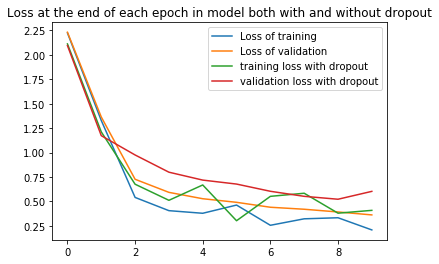

In [7]:
plt.plot(train_losses, label='Loss of training')
plt.plot(test_losses, label='Loss of validation')
plt.legend();
plt.plot(train_losses_d, label='training loss with dropout')
plt.plot(test_losses_d, label='validation loss with dropout')
plt.title('Loss at the end of each epoch in model both with and without dropout')
plt.legend();

In [8]:
# Test Accuracy
print(test_correct) # contains the results of all 10 epochs
print()
print(f'Test accuracy: {test_correct[-1].item()*100/10000:.3f}%') # print the most recent result as a percent

[tensor(4591), tensor(6724), tensor(8280), tensor(8671), tensor(8921), tensor(9022), tensor(9108), tensor(9148), tensor(9193), tensor(9258)]

Test accuracy: 92.580%


In [9]:
# However, we'd like to compare the predicted values to the ground truth (the y_test labels), so we'll run the test set through the trained model all at once.

# Extract the data all at once, not in batches
test_load_all = torch.utils.data.DataLoader(testset, batch_size=10000, shuffle=False)

with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model_1layer(X_test.view(len(X_test), -1))  # pass in a flattened view of X_test
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(testset)} = {correct.item()*100/(len(testset)):7.3f}%')

Test accuracy: 9258/10000 =  92.580%


In [10]:
# Test Accuracy
print(test_correct_d) # contains the results of all 10 epochs
print()
print(f'Test accuracy: {test_correct_d[-1].item()*100/10000:.3f}%') # print the most recent result as a percent

[tensor(4185), tensor(6201), tensor(7514), tensor(8106), tensor(8320), tensor(8565), tensor(8655), tensor(8697), tensor(8791), tensor(8843)]

Test accuracy: 88.430%


In [11]:
# However, we'd like to compare the predicted values to the ground truth (the y_test labels), so we'll run the test set through the trained model all at once.

# Extract the data all at once, not in batches
test_load_all = torch.utils.data.DataLoader(testset, batch_size=10000, shuffle=False)

with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model_drop_1layer(X_test.view(len(X_test), -1))  # pass in a flattened view of X_test
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(testset)} = {correct.item()*100/(len(testset)):7.3f}%')

Test accuracy: 8814/10000 =  88.140%


3 Layer Network with ReLU Activation

In [12]:
# Without Dropout

torch.manual_seed(100)
model_2layer=nn.Sequential(
    nn.Linear(784,512),
    nn.ReLU(),
    nn.Linear(512,256),
    nn.ReLU(),
    nn.Linear(256,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,10),
    nn.LogSoftmax(dim=1)
)
# Define loss function & optimizer
criterion = nn.CrossEntropyLoss()
optimizer=optim.SGD(model_2layer.parameters(), lr=0.01)

print("Model without dropout:",model_2layer)

# With Dropout

model_drop_2layer= nn.Sequential(
    nn.Linear(784,512),
    torch.nn.Dropout(0.2),
    nn.ReLU(),
    nn.Linear(512,256),
    nn.ReLU(),
    nn.Linear(256,128),
    torch.nn.Dropout(0.2),
    nn.ReLU(),
    nn.Linear(128,64),
    torch.nn.Dropout(0.2),
    nn.ReLU(),
    nn.Linear(64,10),
    nn.LogSoftmax(dim=1)
)
optimizer_drop=optim.SGD(model_drop_2layer.parameters(), lr=0.01)
print("Model with dropout:",model_drop_2layer)

Model without dropout: Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=128, bias=True)
  (5): ReLU()
  (6): Linear(in_features=128, out_features=64, bias=True)
  (7): ReLU()
  (8): Linear(in_features=64, out_features=10, bias=True)
  (9): LogSoftmax()
)
Model with dropout: Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): Dropout(p=0.2, inplace=False)
  (2): ReLU()
  (3): Linear(in_features=512, out_features=256, bias=True)
  (4): ReLU()
  (5): Linear(in_features=256, out_features=128, bias=True)
  (6): Dropout(p=0.2, inplace=False)
  (7): ReLU()
  (8): Linear(in_features=128, out_features=64, bias=True)
  (9): Dropout(p=0.2, inplace=False)
  (10): ReLU()
  (11): Linear(in_features=64, out_features=10, bias=True)
  (12): LogSoftmax()
)


In [13]:
count_parameters(model_2layer)

401408
   512
131072
   256
 32768
   128
  8192
    64
   640
    10
______
575050


In [14]:
epochs = 10
# Without dropout
train_losses,test_losses=[],[]
train_correct,test_correct = [],[]
acc =[]

for i in range(epochs):
    train = 0
    test = 0
    runningloss = 0

    # Run the training batches on model without dropout
    for b, (X_train, y_train) in enumerate(trainloader):
        b+=1
        
        # Apply the model
        y_pred = model_2layer(X_train.view(100, -1))  # Here we flatten X_train
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%300 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  accuracy: {train.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(train)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(testloader):

            # Apply the model
            y_val = model_2layer(X_test.view(len(X_test), -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            test += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(test)

    


epoch:  0  batch:  300 [ 30000/60000]  loss: 2.29386139  accuracy:  10.913%
epoch:  0  batch:  600 [ 60000/60000]  loss: 2.29303360  accuracy:  19.920%
epoch:  1  batch:  300 [ 30000/60000]  loss: 2.29585814  accuracy:  32.007%
epoch:  1  batch:  600 [ 60000/60000]  loss: 2.27906179  accuracy:  28.307%
epoch:  2  batch:  300 [ 30000/60000]  loss: 2.15381813  accuracy:  28.100%
epoch:  2  batch:  600 [ 60000/60000]  loss: 1.84461474  accuracy:  31.892%
epoch:  3  batch:  300 [ 30000/60000]  loss: 1.20166314  accuracy:  51.437%
epoch:  3  batch:  600 [ 60000/60000]  loss: 0.79578125  accuracy:  61.860%
epoch:  4  batch:  300 [ 30000/60000]  loss: 0.82384962  accuracy:  78.313%
epoch:  4  batch:  600 [ 60000/60000]  loss: 0.62874830  accuracy:  80.132%
epoch:  5  batch:  300 [ 30000/60000]  loss: 0.63855243  accuracy:  84.570%
epoch:  5  batch:  600 [ 60000/60000]  loss: 0.43133548  accuracy:  85.367%
epoch:  6  batch:  300 [ 30000/60000]  loss: 0.35322052  accuracy:  87.387%
epoch:  6  b

In [15]:
#With dropout

print(" Repeating the above steps on model with dropout 0.5")
epochs = 10
train_losses_d,test_losses_d=[],[]
train_correct_d,test_correct_d = [],[]
acc_d =[]
for i in range(epochs):
    train_d = 0
    test_d = 0
    runningloss_d = 0
    
    
    # Run the training batches on model with dropout
    for b, (X_train, y_train) in enumerate(trainloader):
        b+=1
        
        # Apply the model
        y_pred_d = model_drop_2layer(X_train.view(100, -1))  # Here we flatten X_train
        loss_d = criterion(y_pred_d, y_train)
 
        # Tally the number of correct predictions
        predicted_d = torch.max(y_pred_d.data, 1)[1]
        batch_corr_d = (predicted_d == y_train).sum()
        train_d += batch_corr_d
        
        # Update parameters
        optimizer_drop.zero_grad()
        loss_d.backward()
        optimizer_drop.step()
        
        # Print interim results
        if b%300 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss_d.item():10.8f}  accuracy: {train_d.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses_d.append(loss_d)
    train_correct_d.append(train_d)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(testloader):

            # Apply the model
            y_val = model_drop_2layer(X_test.view(len(X_test), -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted_d = torch.max(y_val.data, 1)[1] 
            test_d += (predicted_d == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss_d = criterion(y_val, y_test)
    test_losses_d.append(loss_d)
    test_correct_d.append(test_d)
        


 Repeating the above steps on model with dropout 0.5
epoch:  0  batch:  300 [ 30000/60000]  loss: 2.30731964  accuracy:  10.810%
epoch:  0  batch:  600 [ 60000/60000]  loss: 2.29485726  accuracy:  11.758%
epoch:  1  batch:  300 [ 30000/60000]  loss: 2.29725361  accuracy:  11.350%
epoch:  1  batch:  600 [ 60000/60000]  loss: 2.28303051  accuracy:  12.077%
epoch:  2  batch:  300 [ 30000/60000]  loss: 2.26024771  accuracy:  18.490%
epoch:  2  batch:  600 [ 60000/60000]  loss: 2.20107889  accuracy:  25.802%
epoch:  3  batch:  300 [ 30000/60000]  loss: 1.88023973  accuracy:  41.283%
epoch:  3  batch:  600 [ 60000/60000]  loss: 1.30707943  accuracy:  44.052%
epoch:  4  batch:  300 [ 30000/60000]  loss: 1.04058516  accuracy:  60.610%
epoch:  4  batch:  600 [ 60000/60000]  loss: 0.84118026  accuracy:  64.648%
epoch:  5  batch:  300 [ 30000/60000]  loss: 0.97777957  accuracy:  73.880%
epoch:  5  batch:  600 [ 60000/60000]  loss: 0.66196144  accuracy:  75.518%
epoch:  6  batch:  300 [ 30000/6000

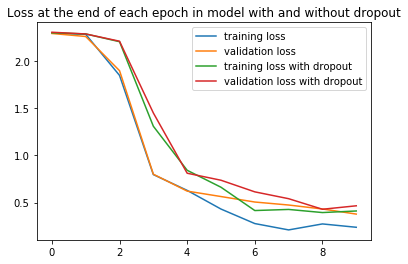

In [16]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.legend();
plt.plot(train_losses_d, label='training loss with dropout')
plt.plot(test_losses_d, label='validation loss with dropout')
plt.title('Loss at the end of each epoch in model with and without dropout')
plt.legend();

In [17]:
# Test Accuracy
print(test_correct) # contains the results of all 10 epochs
print()
print(f'Test accuracy: {test_correct[-1].item()*100/10000:.3f}%') # print the most recent result as a percent

[tensor(3899), tensor(2468), tensor(4014), tensor(7648), tensor(8371), tensor(8732), tensor(8918), tensor(9012), tensor(9089), tensor(9190)]

Test accuracy: 91.900%


In [18]:
# However, we'd like to compare the predicted values to the ground truth (the y_test labels), so we'll run the test set through the trained model all at once.

# Extract the data all at once, not in batches
test_load_all = torch.utils.data.DataLoader(testset, batch_size=10000, shuffle=False)

with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model_2layer(X_test.view(len(X_test), -1))  # pass in a flattened view of X_test
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(testset)} = {correct.item()*100/(len(testset)):7.3f}%')

Test accuracy: 9190/10000 =  91.900%


In [19]:
# Test Accuracy
print(test_correct_d) # contains the results of all 10 epochs
print()
print(f'Test accuracy: {test_correct_d[-1].item()*100/10000:.3f}%') # print the most recent result as a percent

[tensor(1167), tensor(1368), tensor(3939), tensor(5457), tensor(7187), tensor(7982), tensor(8391), tensor(8701), tensor(8828), tensor(8948)]

Test accuracy: 89.480%


In [20]:
# However, we'd like to compare the predicted values to the ground truth (the y_test labels), so we'll run the test set through the trained model all at once.

# Extract the data all at once, not in batches
test_load_all = torch.utils.data.DataLoader(testset, batch_size=10000, shuffle=False)

with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model_drop_2layer(X_test.view(len(X_test), -1))  # pass in a flattened view of X_test
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(testset)} = {correct.item()*100/(len(testset)):7.3f}%')

Test accuracy: 8982/10000 =  89.820%


## 1Layer Network with Tan H Activation

In [21]:
# Without Dropout

torch.manual_seed(100)
model_1layer_t=nn.Sequential(
    nn.Linear(784,256),
    nn.Tanh(),
    nn.Linear(256,64),
    nn.Tanh(),
    nn.Linear(64,10),
    nn.LogSoftmax(dim=1)
)
# Define loss function & optimizer
criterion = nn.CrossEntropyLoss()
optimizer_1layer_s=optim.SGD(model_1layer_t.parameters(), lr=0.01)

print("Model without dropout:",model_1layer_t)

# With Dropout

model_drop_1layer_t= nn.Sequential(
    nn.Linear(784,256),
    torch.nn.Dropout(0.2),
    nn.Tanh(),
    nn.Linear(256,64),
    torch.nn.Dropout(0.2),
    nn.Tanh(),
    nn.Linear(64,10),
    nn.LogSoftmax(dim=1)
)
optimizer_drop_1layer_s=optim.SGD(model_drop_1layer_t.parameters(), lr=0.01)
print("Model with dropout:",model_drop_1layer_t)

Model without dropout: Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): Tanh()
  (2): Linear(in_features=256, out_features=64, bias=True)
  (3): Tanh()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)
Model with dropout: Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): Dropout(p=0.2, inplace=False)
  (2): Tanh()
  (3): Linear(in_features=256, out_features=64, bias=True)
  (4): Dropout(p=0.2, inplace=False)
  (5): Tanh()
  (6): Linear(in_features=64, out_features=10, bias=True)
  (7): LogSoftmax()
)


In [22]:
count_parameters(model_1layer_t)

200704
   256
 16384
    64
   640
    10
______
218058


In [23]:
epochs = 10
# Without dropout
train_losses,test_losses=[],[]
train_correct,test_correct = [],[]
acc =[]

for i in range(epochs):
    train = 0
    test = 0
    runningloss = 0

    # Run the training batches on model without dropout
    for b, (X_train, y_train) in enumerate(trainloader):
        b+=1
        
        # Apply the model
        y_pred = model_1layer_t(X_train.view(100, -1))  # Here we flatten X_train
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train += batch_corr
        
        # Update parameters
        optimizer_1layer_s.zero_grad()
        loss.backward()
        optimizer_1layer_s.step()
        
        # Print interim results
        if b%300 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  accuracy: {train.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(train)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(testloader):

            # Apply the model
            y_val = model_1layer_t(X_test.view(len(X_test), -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            test += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(test)

    

epoch:  0  batch:  300 [ 30000/60000]  loss: 1.56756306  accuracy:  57.553%
epoch:  0  batch:  600 [ 60000/60000]  loss: 1.01440358  accuracy:  64.982%
epoch:  1  batch:  300 [ 30000/60000]  loss: 0.70211339  accuracy:  81.307%
epoch:  1  batch:  600 [ 60000/60000]  loss: 0.53074080  accuracy:  82.993%
epoch:  2  batch:  300 [ 30000/60000]  loss: 0.53044516  accuracy:  86.677%
epoch:  2  batch:  600 [ 60000/60000]  loss: 0.37927413  accuracy:  87.083%
epoch:  3  batch:  300 [ 30000/60000]  loss: 0.55584759  accuracy:  88.370%
epoch:  3  batch:  600 [ 60000/60000]  loss: 0.35449788  accuracy:  88.778%
epoch:  4  batch:  300 [ 30000/60000]  loss: 0.33011788  accuracy:  89.530%
epoch:  4  batch:  600 [ 60000/60000]  loss: 0.29602414  accuracy:  89.642%
epoch:  5  batch:  300 [ 30000/60000]  loss: 0.35149044  accuracy:  90.120%
epoch:  5  batch:  600 [ 60000/60000]  loss: 0.35141519  accuracy:  90.257%
epoch:  6  batch:  300 [ 30000/60000]  loss: 0.35067517  accuracy:  90.730%
epoch:  6  b

In [24]:
#With dropout
print(" Repeating the above steps on model with dropout 0.2")
epochs = 10
train_losses_d,test_losses_d=[],[]
train_correct_d,test_correct_d = [],[]
acc_d =[]
for i in range(epochs):
    train_d = 0
    test_d = 0
    runningloss_d = 0
    
    
    # Run the training batches on model with dropout
    for b, (X_train, y_train) in enumerate(trainloader):
        b+=1
        
        # Apply the model
        y_pred_d = model_drop_1layer_t(X_train.view(100, -1))  # Here we flatten X_train
        loss_d = criterion(y_pred_d, y_train)
 
        # Tally the number of correct predictions
        predicted_d = torch.max(y_pred_d.data, 1)[1]
        batch_corr_d = (predicted_d == y_train).sum()
        train_d += batch_corr_d
        
        # Update parameters
        optimizer_drop_1layer_s.zero_grad()
        loss_d.backward()
        optimizer_drop_1layer_s.step()
        
        # Print interim results
        if b%300 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss_d.item():10.8f}  accuracy: {train_d.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses_d.append(loss_d)
    train_correct_d.append(train_d)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(testloader):

            # Apply the model
            y_val = model_drop_1layer_t(X_test.view(len(X_test), -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted_d = torch.max(y_val.data, 1)[1] 
            test_d += (predicted_d == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss_d = criterion(y_val, y_test)
    test_losses_d.append(loss_d)
    test_correct_d.append(test_d)
        

 Repeating the above steps on model with dropout 0.2
epoch:  0  batch:  300 [ 30000/60000]  loss: 1.68491888  accuracy:  45.923%
epoch:  0  batch:  600 [ 60000/60000]  loss: 1.13496733  accuracy:  57.590%
epoch:  1  batch:  300 [ 30000/60000]  loss: 0.79913521  accuracy:  77.207%
epoch:  1  batch:  600 [ 60000/60000]  loss: 0.67532754  accuracy:  79.527%
epoch:  2  batch:  300 [ 30000/60000]  loss: 0.61624408  accuracy:  84.443%
epoch:  2  batch:  600 [ 60000/60000]  loss: 0.61277127  accuracy:  85.033%
epoch:  3  batch:  300 [ 30000/60000]  loss: 0.34278539  accuracy:  87.017%
epoch:  3  batch:  600 [ 60000/60000]  loss: 0.48997018  accuracy:  87.418%
epoch:  4  batch:  300 [ 30000/60000]  loss: 0.37012023  accuracy:  88.113%
epoch:  4  batch:  600 [ 60000/60000]  loss: 0.29717061  accuracy:  88.532%
epoch:  5  batch:  300 [ 30000/60000]  loss: 0.43608975  accuracy:  89.103%
epoch:  5  batch:  600 [ 60000/60000]  loss: 0.38042051  accuracy:  89.287%
epoch:  6  batch:  300 [ 30000/6000

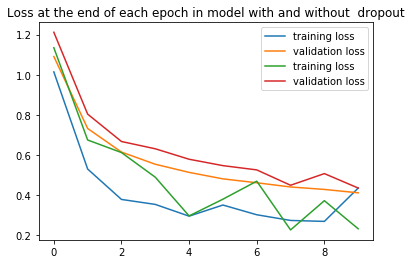

In [25]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.legend();
plt.plot(train_losses_d, label='training loss')
plt.plot(test_losses_d, label='validation loss')
plt.title('Loss at the end of each epoch in model with and without  dropout')
plt.legend();

In [26]:
# Test Accuracy
print(test_correct) # contains the results of all 10 epochs
print()
print(f'Test accuracy: {test_correct[-1].item()*100/10000:.3f}%') # print the most recent result as a percent

[tensor(7848), tensor(8651), tensor(8867), tensor(8985), tensor(9048), tensor(9083), tensor(9114), tensor(9144), tensor(9180), tensor(9200)]

Test accuracy: 92.000%


In [27]:
# However, we'd like to compare the predicted values to the ground truth (the y_test labels), so we'll run the test set through the trained model all at once.

# Extract the data all at once, not in batches
test_load_all = torch.utils.data.DataLoader(testset, batch_size=10000, shuffle=False)

with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model_1layer_t(X_test.view(len(X_test), -1))  # pass in a flattened view of X_test
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(testset)} = {correct.item()*100/(len(testset)):7.3f}%')

Test accuracy: 9200/10000 =  92.000%


In [28]:
# Test Accuracy
print(test_correct_d) # contains the results of all 10 epochs
print()
print(f'Test accuracy: {test_correct_d[-1].item()*100/10000:.3f}%') # print the most recent result as a percent

[tensor(7476), tensor(8396), tensor(8717), tensor(8867), tensor(8928), tensor(9002), tensor(9007), tensor(9046), tensor(9103), tensor(9125)]

Test accuracy: 91.250%


In [29]:
# However, we'd like to compare the predicted values to the ground truth (the y_test labels), so we'll run the test set through the trained model all at once.

# Extract the data all at once, not in batches
test_load_all = torch.utils.data.DataLoader(testset, batch_size=10000, shuffle=False)

with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model_drop_1layer_t(X_test.view(len(X_test), -1))  # pass in a flattened view of X_test
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(testset)} = {correct.item()*100/(len(testset)):7.3f}%')

Test accuracy: 9130/10000 =  91.300%


## 2Layer Network with TanH Activation

In [30]:
# Without Dropout

torch.manual_seed(101)
model_2layer_s=nn.Sequential(
    nn.Linear(784,256),
    nn.Tanh(),
    nn.Linear(256,128),
    nn.Tanh(),
    nn.Linear(128,64),
    nn.Tanh(),
    nn.Linear(64,10),
    nn.LogSoftmax(dim=1)
)
# Define loss function & optimizer
criterion = nn.CrossEntropyLoss()
optimizer_s=optim.SGD(model_2layer_s.parameters(), lr=0.01)

print("Model without dropout:",model_2layer_s)

# With Dropout

model_drop_2layer_s= nn.Sequential(
    nn.Linear(784,256),
    torch.nn.Dropout(0.5),
    nn.Tanh(),
    nn.Linear(256,128),
    torch.nn.Dropout(0.5),
    nn.Tanh(),
    nn.Linear(128,64),
    torch.nn.Dropout(0.5),
    nn.Tanh(),
    nn.Linear(64,10),
    nn.LogSoftmax(dim=1)
)
optimizer_drop_s=optim.SGD(model_drop_2layer_s.parameters(), lr=0.01)
print("Model with dropout:",model_drop_2layer_s)

Model without dropout: Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): Tanh()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): Tanh()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): Tanh()
  (6): Linear(in_features=64, out_features=10, bias=True)
  (7): LogSoftmax()
)
Model with dropout: Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): Dropout(p=0.5, inplace=False)
  (2): Tanh()
  (3): Linear(in_features=256, out_features=128, bias=True)
  (4): Dropout(p=0.5, inplace=False)
  (5): Tanh()
  (6): Linear(in_features=128, out_features=64, bias=True)
  (7): Dropout(p=0.5, inplace=False)
  (8): Tanh()
  (9): Linear(in_features=64, out_features=10, bias=True)
  (10): LogSoftmax()
)


In [31]:
count_parameters(model_2layer_s)

200704
   256
 32768
   128
  8192
    64
   640
    10
______
242762


In [32]:

epochs = 10
# Without dropout
train_losses,test_losses=[],[]
train_correct,test_correct = [],[]
acc =[]

for i in range(epochs):
    train = 0
    test = 0
    runningloss = 0

    # Run the training batches on model without dropout
    for b, (X_train, y_train) in enumerate(trainloader):
        b+=1
        
        # Apply the model
        y_pred = model_2layer_s(X_train.view(100, -1))  # Here we flatten X_train
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train += batch_corr
        
        # Update parameters
        optimizer_s.zero_grad()
        loss.backward()
        optimizer_s.step()
        
        # Print interim results
        if b%300 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  accuracy: {train.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(train)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(testloader):

            # Apply the model
            y_val = model_2layer_s(X_test.view(len(X_test), -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            test += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(test)



epoch:  0  batch:  300 [ 30000/60000]  loss: 2.06243157  accuracy:  37.633%
epoch:  0  batch:  600 [ 60000/60000]  loss: 1.36925685  accuracy:  50.857%
epoch:  1  batch:  300 [ 30000/60000]  loss: 0.84979647  accuracy:  72.947%
epoch:  1  batch:  600 [ 60000/60000]  loss: 0.60842168  accuracy:  76.862%
epoch:  2  batch:  300 [ 30000/60000]  loss: 0.52495557  accuracy:  84.633%
epoch:  2  batch:  600 [ 60000/60000]  loss: 0.39138252  accuracy:  85.392%
epoch:  3  batch:  300 [ 30000/60000]  loss: 0.52369833  accuracy:  87.273%
epoch:  3  batch:  600 [ 60000/60000]  loss: 0.42328218  accuracy:  87.812%
epoch:  4  batch:  300 [ 30000/60000]  loss: 0.58286911  accuracy:  88.637%
epoch:  4  batch:  600 [ 60000/60000]  loss: 0.33545929  accuracy:  88.947%
epoch:  5  batch:  300 [ 30000/60000]  loss: 0.38869521  accuracy:  89.517%
epoch:  5  batch:  600 [ 60000/60000]  loss: 0.26462972  accuracy:  89.757%
epoch:  6  batch:  300 [ 30000/60000]  loss: 0.25737214  accuracy:  90.050%
epoch:  6  b

In [33]:
#With dropout
print(" Repeating the above steps on model with dropout 0.5")
epochs = 10
train_losses_d,test_losses_d=[],[]
train_correct_d,test_correct_d = [],[]
acc_d =[]
for i in range(epochs):
    train_d = 0
    test_d = 0
    runningloss_d = 0
    
    
    # Run the training batches on model with dropout
    for b, (X_train, y_train) in enumerate(trainloader):
        b+=1
        
        # Apply the model
        y_pred_d = model_drop_2layer_s(X_train.view(100, -1))  # Here we flatten X_train
        loss_d = criterion(y_pred_d, y_train)
 
        # Tally the number of correct predictions
        predicted_d = torch.max(y_pred_d.data, 1)[1]
        batch_corr_d = (predicted_d == y_train).sum()
        train_d += batch_corr_d
        
        # Update parameters
        optimizer_drop_s.zero_grad()
        loss_d.backward()
        optimizer_drop_s.step()
        
        # Print interim results
        if b%300 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss_d.item():10.8f}  accuracy: {train_d.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses_d.append(loss_d)
    train_correct_d.append(train_d)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(testloader):

            # Apply the model
            y_val = model_drop_2layer_s(X_test.view(len(X_test), -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted_d = torch.max(y_val.data, 1)[1] 
            test_d += (predicted_d == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss_d = criterion(y_val, y_test)
    test_losses_d.append(loss_d)
    test_correct_d.append(test_d)
        


 Repeating the above steps on model with dropout 0.5
epoch:  0  batch:  300 [ 30000/60000]  loss: 2.15619516  accuracy:  25.393%
epoch:  0  batch:  600 [ 60000/60000]  loss: 1.86289883  accuracy:  37.203%
epoch:  1  batch:  300 [ 30000/60000]  loss: 1.38756168  accuracy:  55.223%
epoch:  1  batch:  600 [ 60000/60000]  loss: 1.27306283  accuracy:  58.985%
epoch:  2  batch:  300 [ 30000/60000]  loss: 0.96043211  accuracy:  68.760%
epoch:  2  batch:  600 [ 60000/60000]  loss: 0.79526848  accuracy:  71.360%
epoch:  3  batch:  300 [ 30000/60000]  loss: 0.78638947  accuracy:  77.440%
epoch:  3  batch:  600 [ 60000/60000]  loss: 0.79735637  accuracy:  78.777%
epoch:  4  batch:  300 [ 30000/60000]  loss: 0.60941315  accuracy:  81.897%
epoch:  4  batch:  600 [ 60000/60000]  loss: 0.55849963  accuracy:  82.597%
epoch:  5  batch:  300 [ 30000/60000]  loss: 0.76636344  accuracy:  84.023%
epoch:  5  batch:  600 [ 60000/60000]  loss: 0.69182104  accuracy:  84.453%
epoch:  6  batch:  300 [ 30000/6000

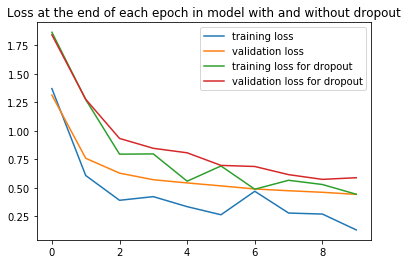

In [34]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.legend();
plt.plot(train_losses_d, label='training loss for dropout' )
plt.plot(test_losses_d, label='validation loss for dropout')
plt.title('Loss at the end of each epoch in model with and without dropout')
plt.legend();

In [35]:
# Test Accuracy
print(test_correct) # contains the results of all 10 epochs
print()
print(f'Test accuracy: {test_correct[-1].item()*100/10000:.3f}%') # print the most recent result as a percent

[tensor(6855), tensor(8326), tensor(8730), tensor(8868), tensor(8932), tensor(8980), tensor(9049), tensor(9096), tensor(9126), tensor(9158)]

Test accuracy: 91.580%


In [36]:
# However, we'd like to compare the predicted values to the ground truth (the y_test labels), so we'll run the test set through the trained model all at once.

# Extract the data all at once, not in batches
test_load_all = torch.utils.data.DataLoader(testset, batch_size=10000, shuffle=False)

with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model_2layer_s(X_test.view(len(X_test), -1))  # pass in a flattened view of X_test
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(testset)} = {correct.item()*100/(len(testset)):7.3f}%')

Test accuracy: 9158/10000 =  91.580%


In [37]:
# Test Accuracy
print(test_correct_d) # contains the results of all 10 epochs
print()
print(f'Test accuracy: {test_correct_d[-1].item()*100/10000:.3f}%') # print the most recent result as a percent

[tensor(5217), tensor(6573), tensor(7612), tensor(8149), tensor(8443), tensor(8549), tensor(8647), tensor(8710), tensor(8749), tensor(8764)]

Test accuracy: 87.640%


In [38]:
# However, we'd like to compare the predicted values to the ground truth (the y_test labels), so we'll run the test set through the trained model all at once.

# Extract the data all at once, not in batches
test_load_all = torch.utils.data.DataLoader(testset, batch_size=10000, shuffle=False)

with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model_drop_2layer_s(X_test.view(len(X_test), -1))  # pass in a flattened view of X_test
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(testset)} = {correct.item()*100/(len(testset)):7.3f}%')

Test accuracy: 8790/10000 =  87.900%
